In [1]:
#ASSIGNMENT APPS APPSTORE

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
path='/Users/andreaco1991/Desktop/UNIBO/materiale/DATA MINING/assignment/AppleStore.csv'
df=pd.read_csv(path,sep=',',usecols=[3,5,6,7,8,9,11,12])
print(df.shape)
type(df)

(7197, 8)


pandas.core.frame.DataFrame

In [3]:
df.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre
0,100788224,3.99,21292,26,4.0,4.5,4+,Games
1,158578688,0.00,161065,26,4.0,3.5,4+,Productivity
2,100524032,0.00,188583,2822,3.5,4.5,4+,Weather
3,128512000,0.00,262241,649,4.0,4.5,12+,Shopping
4,92774400,0.00,985920,5320,4.5,5.0,4+,Reference


In [4]:
genre=np.unique(df.loc[:,['prime_genre']])

In [5]:
df.dtypes

size_bytes            int64
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
cont_rating          object
prime_genre          object
dtype: object

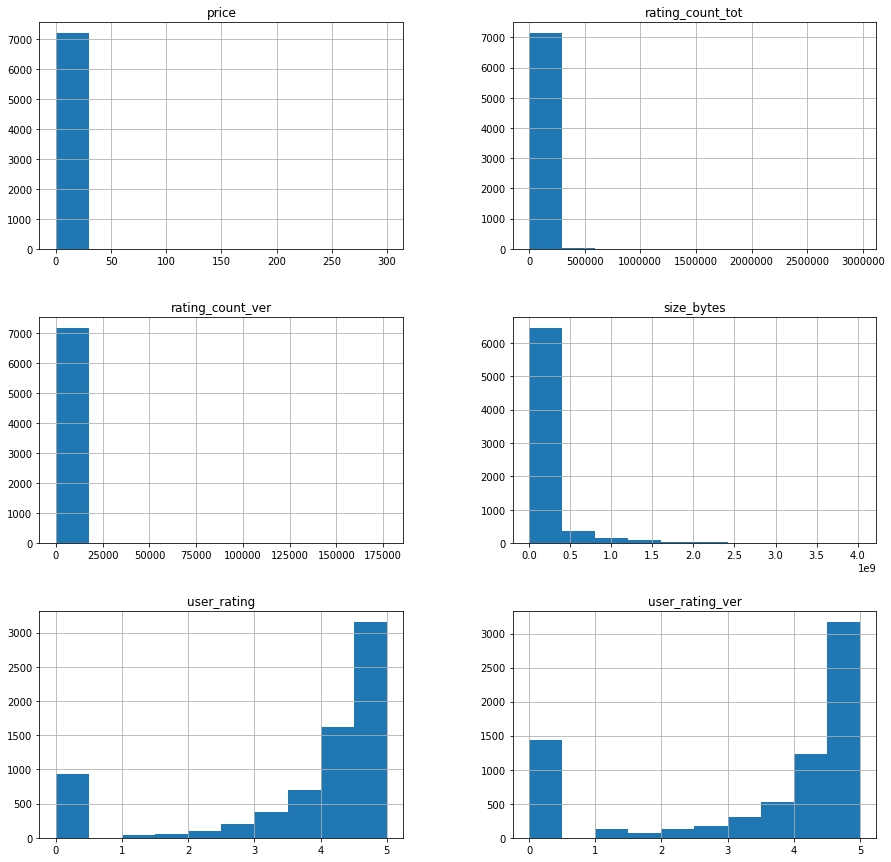

In [6]:
pd.DataFrame.hist(df, figsize = [15,15]);

In [7]:
df.describe()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver
count,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000
mean,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578
std,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363
min,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000
50%,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000
75%,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000
max,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000


In [8]:
df['delta']=df.iloc[:,4]-df.iloc[:,5]

In [9]:
mean_rat=np.mean(df.iloc[:,4])# Computation mean rating of all versions
mean_ratv=np.mean(df.iloc[:,5]) # Computation mean rating last version
mean_delta_rat=np.mean(df.iloc[:,-1])# Computation mean delta between the two rating 
print([mean_rat,mean_ratv,mean_delta_rat])

[3.526955675976101, 3.253577879672086, 0.27337779630401554]


In [10]:
dev_from_meanrat=((df.iloc[:,4])-mean_rat)**2 # Deviance computation
dev_from_meanratv=((df.iloc[:,5])-mean_ratv)**2
dev_from_delta=((df.iloc[:,-1])-mean_delta_rat)**2

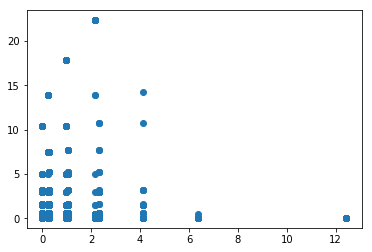

In [11]:
plt.scatter(dev_from_meanrat, dev_from_delta)

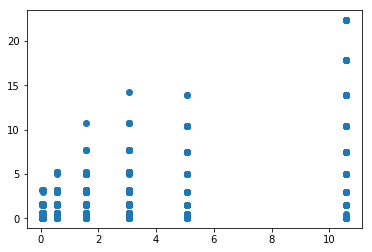

In [12]:
plt.scatter(dev_from_meanratv, dev_from_delta)
plt.show()

In [13]:
print(np.corrcoef(dev_from_meanrat,dev_from_delta)) # Computation of correlation
print(np.corrcoef(dev_from_meanratv,dev_from_delta))

[[ 1.         -0.12914727]
 [-0.12914727  1.        ]]
[[1.         0.46890966]
 [0.46890966 1.        ]]


In [14]:
mean_pr=np.mean(df.iloc[:,1])
mean_siz=np.mean(df.iloc[:,0])

In [15]:
dev_from_meanp=(df.iloc[:,1])-mean_pr
dev_from_meansiz=(df.iloc[:,0])-mean_siz
print(dev_from_meanp.shape)
print(dev_from_meansiz.shape)

(7197,)
(7197,)


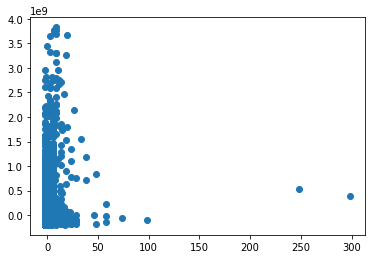

In [16]:
plt.scatter(dev_from_meanp, dev_from_meansiz)
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


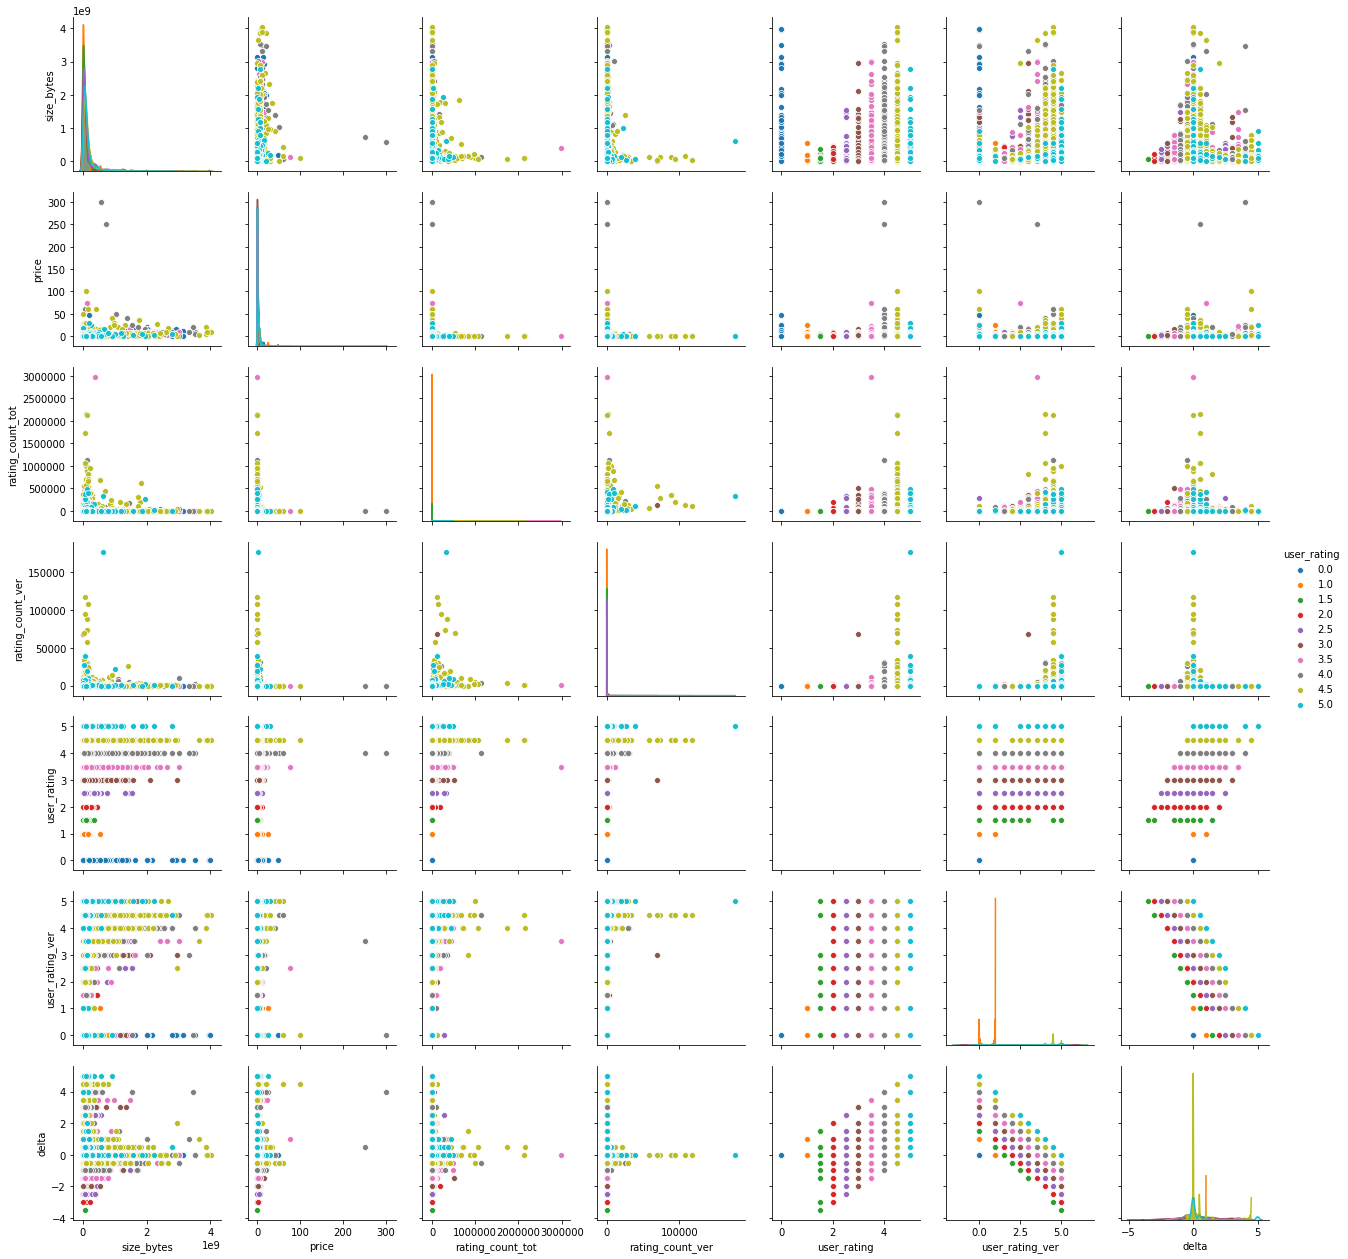

In [17]:
# Create the default pairplot
sns.pairplot(df, hue='user_rating')

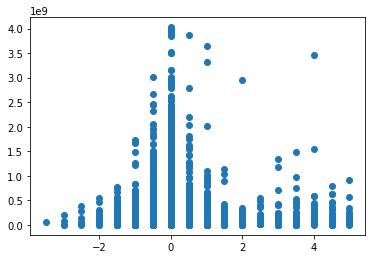

In [17]:
plt.scatter(df.iloc[:,-1], df.iloc[:,0]) #delta and size_bytes

(array([   5.,   36.,  339., 1031., 4847.,  350.,   51.,  123.,  224.,
         191.]),
 array([-3.5 , -2.65, -1.8 , -0.95, -0.1 ,  0.75,  1.6 ,  2.45,  3.3 ,
         4.15,  5.  ]),
 <a list of 10 Patch objects>)

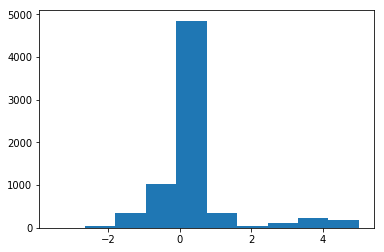

In [18]:
plt.hist(df.iloc[:,-1])

In [19]:
rating_rank=np.unique(df.loc[:,['user_rating']])
rating_rank

array([0. , 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [20]:
user_rating=df.loc[:,['user_rating']]
user_rating=np.asarray(user_rating)
user_rating[56]

array([4.5])

In [22]:
"""#Count how many apps for each rating
count_0=[]
count_0_5=[]
count_1=[]
count_1_5=[]
count_2=[]
count_2_5=[]
count_3=[]
count_3_5=[]
count_4=[]
count_4_5=[]
count_5=[]

for value in range(user_rating.shape[0]):
        if user_rating[value] == 0:
            count_0.append(user_rating[value])
        elif user_rating[value] == 0.5:
            count_0_5.append(user_rating[value])
        elif user_rating[value] == 1:
            count_1.append(user_rating[value])
        elif user_rating[value] == 1.5:
            count_1_5.append(user_rating[value])
        elif user_rating[value] == 2:
            count_2.append(user_rating[value]) 
        elif user_rating[value] == 2.5:
            count_2_5.append(user_rating[value])
        elif user_rating[value] == 3:
            count_3.append(user_rating[value]) 
        elif user_rating[value] == 3.5:
            count_3_5.append(user_rating[value])
        elif user_rating[value] == 4:
            count_4.append(user_rating[value])
        elif user_rating[value] == 4.5:
            count_4_5.append(user_rating[value])
        elif user_rating[value] == 5:
            count_5.append(user_rating[value])             
len(count_0)
len(count_0_5)
len(count_5)""""

SyntaxError: EOL while scanning string literal (<ipython-input-22-55907c38c74b>, line 39)

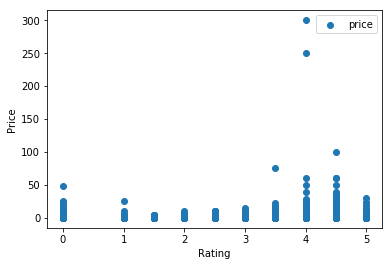

In [21]:
plt.scatter(df['user_rating'],df['price'])
plt.xlabel('Rating')
plt.ylabel('Price')
plt.legend()
plt.show()

In [22]:
df.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,delta
0,100788224,3.99,21292,26,4.0,4.5,4+,Games,-0.5
1,158578688,0.00,161065,26,4.0,3.5,4+,Productivity,0.5
2,100524032,0.00,188583,2822,3.5,4.5,4+,Weather,-1.0
3,128512000,0.00,262241,649,4.0,4.5,12+,Shopping,-0.5
4,92774400,0.00,985920,5320,4.5,5.0,4+,Reference,-0.5


In [22]:
genre=np.unique(df.loc[:,['prime_genre']])
print(genre)
len(genre)

['Book' 'Business' 'Catalogs' 'Education' 'Entertainment' 'Finance'
 'Food & Drink' 'Games' 'Health & Fitness' 'Lifestyle' 'Medical' 'Music'
 'Navigation' 'News' 'Photo & Video' 'Productivity' 'Reference' 'Shopping'
 'Social Networking' 'Sports' 'Travel' 'Utilities' 'Weather']


23

In [23]:
a=pd.get_dummies(df, columns=['cont_rating','prime_genre']) # create dummies in order to apply Kmeans

In [24]:
#cluster with 3 clusters
km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=42)

y_km = km.fit_predict(a)

In [25]:
labels=np.unique(y_km)

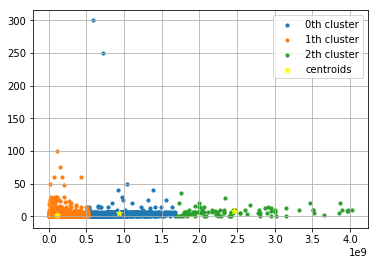

In [26]:
for i in  range(len(labels)): # repeat varying i in the range of the length of labels
    X_plot=a[y_km==i]

    plt.scatter(X_plot.iloc[:,0], X_plot.iloc[:,1]         
                , marker='o'
                , s=10,label='{0}th cluster'.format(i))

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',c='yellow', label='centroids')

plt.legend()
plt.grid()  # plots a grid on the data
plt.show()

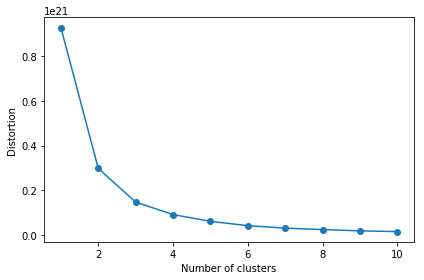

In [27]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(a)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions , marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('./figures/elbow.png', dpi=300)
plt.show()

In [28]:
#try clustering with 4 clusters
km = KMeans(n_clusters=4, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=42)

y_km = km.fit_predict(a)

In [29]:
labels=np.unique(y_km)

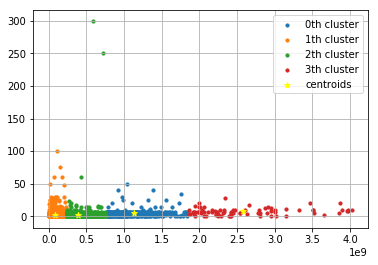

In [30]:
for i in  range(len(labels)): # repeat varying i in the range of the length of labels
    X_plot=a[y_km==i]

    plt.scatter(X_plot.iloc[:,0], X_plot.iloc[:,1]         
                , marker='o'
                , s=10,label='{0}th cluster'.format(i))

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',c='yellow', label='centroids')

plt.legend()
plt.grid()  # plots a grid on the data
plt.show()

In [31]:
### TRY TO DIVIDE THE DATAFRAME FOR EACH GENRE

In [32]:
e=list(genre)
e

['Book',
 'Business',
 'Catalogs',
 'Education',
 'Entertainment',
 'Finance',
 'Food & Drink',
 'Games',
 'Health & Fitness',
 'Lifestyle',
 'Medical',
 'Music',
 'Navigation',
 'News',
 'Photo & Video',
 'Productivity',
 'Reference',
 'Shopping',
 'Social Networking',
 'Sports',
 'Travel',
 'Utilities',
 'Weather']

In [45]:
d={} #create a dictionary with prime genre values as keys and dataframe as values
for i in range(len(e)):
    d["{0}".format(e[i])]=df[df['prime_genre']==e[i]]

In [53]:
d['Book'].dtypes

size_bytes            int64
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
cont_rating          object
prime_genre          object
delta               float64
dtype: object

In [47]:
d['Book'].columns[-3]
#a=pd.get_dummies(df, columns=['cont_rating','prime_genre']) # create dummies in order to apply Kmeans

'cont_rating'

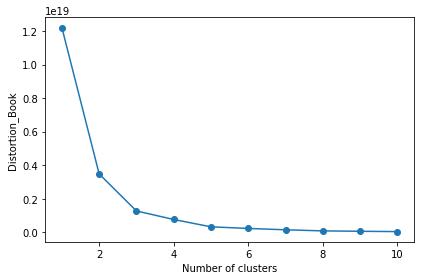

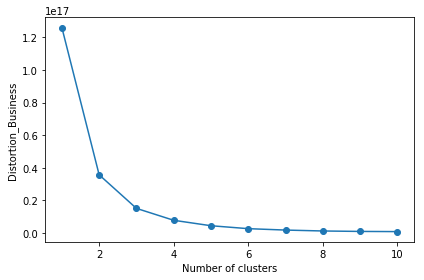

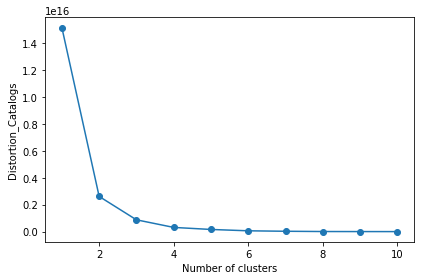

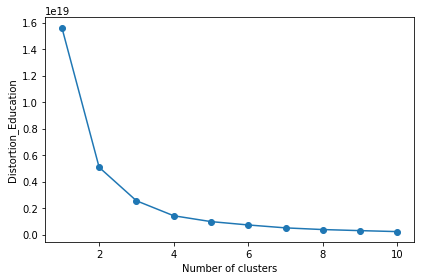

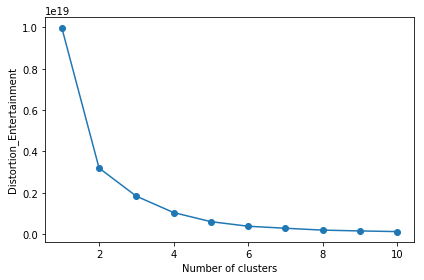

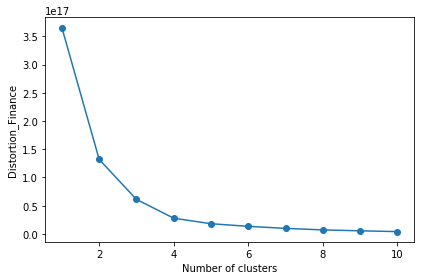

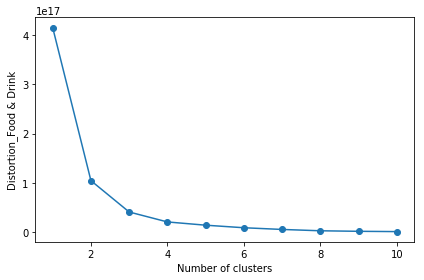

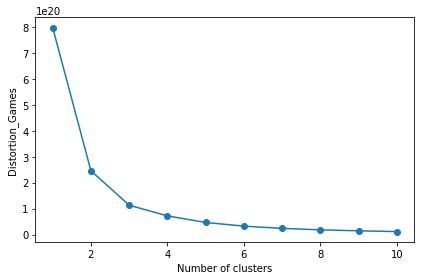

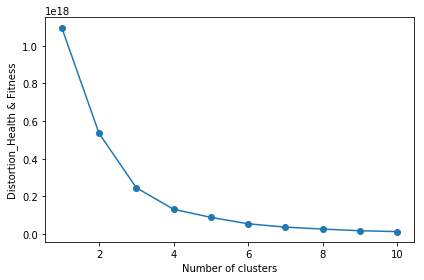

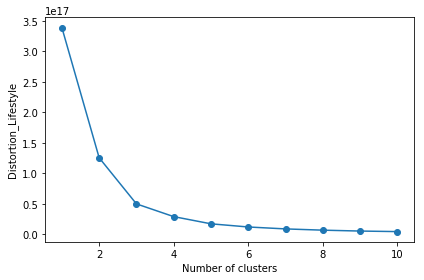

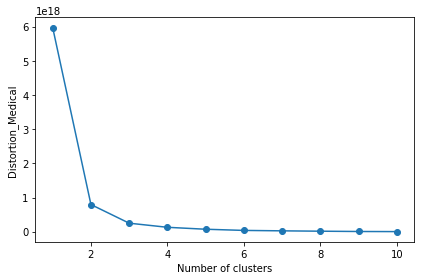

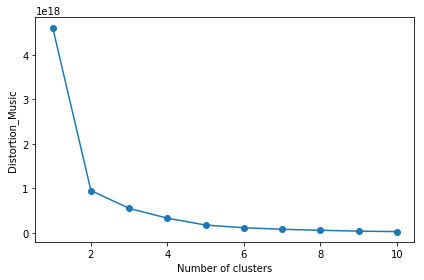

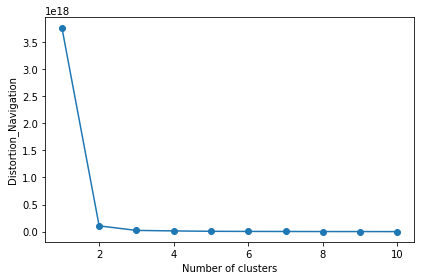

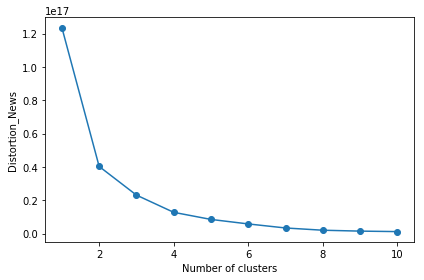

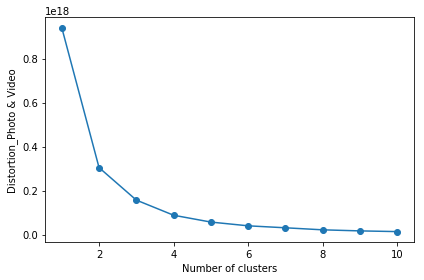

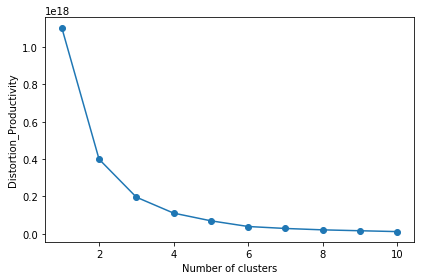

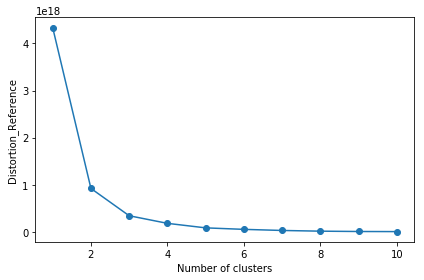

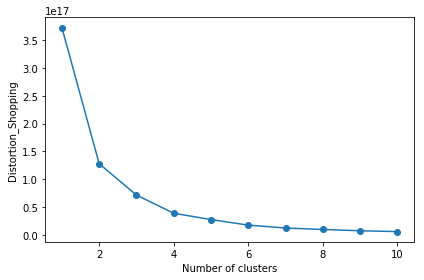

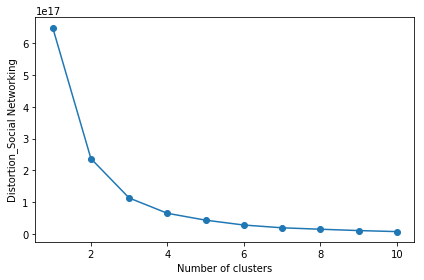

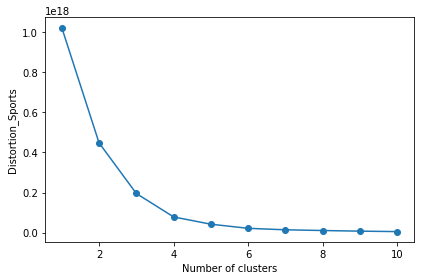

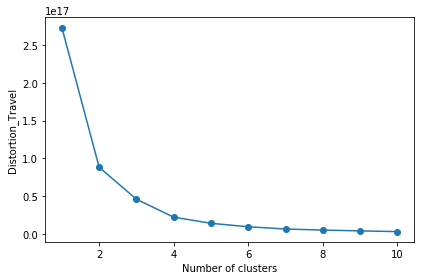

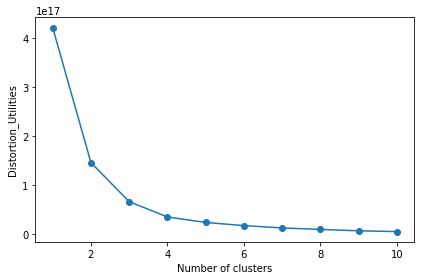

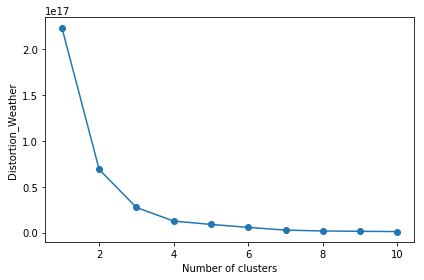

In [48]:
#Calculation distortions (ELBOW method) for each genre
for j in range(len(d)):
    distortions = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=42)
        temp=d["{0}".format(e[j])].drop(d["{0}".format(e[j])].columns[[-2,-3]], axis=1)
        km.fit(temp)
        distortions.append(km.inertia_)
    plt.plot(range(1,11), distortions , marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel("Distortion_{0}".format(e[j]))
    plt.tight_layout()
#plt.savefig('./figures/elbow.png', dpi=300)
    plt.show()

In [49]:
#Silhouette plot calculation for each genre
from sklearn.metrics import silhouette_samples
from matplotlib import cm

In [64]:
q={}
for r in range(len(d)):
    avg=[]
    q["{0}".format(e[r])]=avg
    for j in range (2,10):
        km = KMeans(n_clusters=j, 
                init='k-means++', 
                n_init=10, 
                max_iter=300,
                tol=1e-04,
                random_state=42)
        temp=d["{0}".format(e[r])].drop(d["{0}".format(e[r])].columns[[-2,-3]], axis=1)
        y_km = km.fit_predict(temp)
        cluster_labels = np.unique(y_km)
        n_clusters = cluster_labels.shape[0] 
        silhouette_vals = silhouette_samples(temp, y_km, metric='euclidean') 
        y_ax_lower, y_ax_upper = 0, 0
        yticks = []
        for i, c in enumerate(cluster_labels): # generate pairs index, cluster_label
            c_silhouette_vals = silhouette_vals[y_km==c] # extracts records with the current cluster label
            c_silhouette_vals.sort() # sort the silhouette vals for the current class
            y_ax_upper += len(c_silhouette_vals)
            silhouette_avg = np.mean(silhouette_vals)
            avg.append(silhouette_avg)

In [72]:
q['Book']

{'Book': [0.8548041483817591,
  0.8548041483817591,
  0.8452127689035771,
  0.8452127689035771,
  0.8452127689035771,
  0.7907679890877911,
  0.7907679890877911,
  0.7907679890877911,
  0.7907679890877911,
  0.8003919835823562,
  0.8003919835823562,
  0.8003919835823562,
  0.8003919835823562,
  0.8003919835823562,
  0.7578632020320054,
  0.7578632020320054,
  0.7578632020320054,
  0.7578632020320054,
  0.7578632020320054,
  0.7578632020320054,
  0.6324226930163218,
  0.6324226930163218,
  0.6324226930163218,
  0.6324226930163218,
  0.6324226930163218,
  0.6324226930163218,
  0.6324226930163218,
  0.6268867617052617,
  0.6268867617052617,
  0.6268867617052617,
  0.6268867617052617,
  0.6268867617052617,
  0.6268867617052617,
  0.6268867617052617,
  0.6268867617052617,
  0.6001783671852073,
  0.6001783671852073,
  0.6001783671852073,
  0.6001783671852073,
  0.6001783671852073,
  0.6001783671852073,
  0.6001783671852073,
  0.6001783671852073,
  0.6001783671852073],
 'Business': [0.6441335

In [74]:
#function to remove duplicate values and keeping the same order
def remove_duplicates(values):
    output = []
    seen = set()
    for value in values:
        # If value has not been encountered yet,
        # ... add it to both list and set.
        if value not in seen:
            output.append(value)
            seen.add(value)
    return output

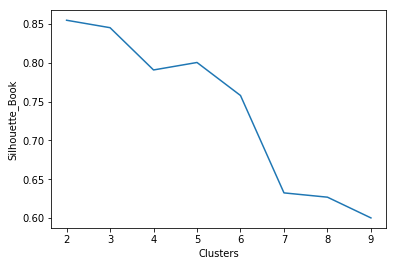

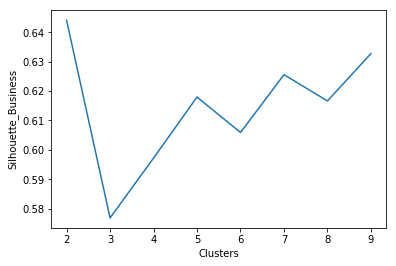

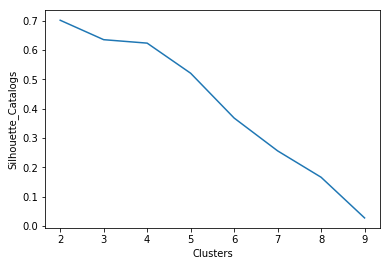

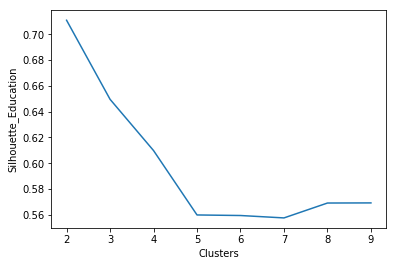

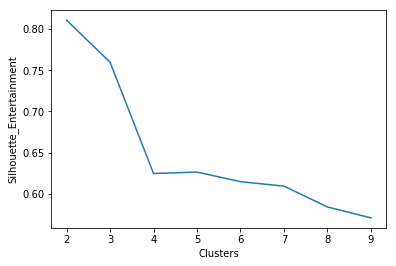

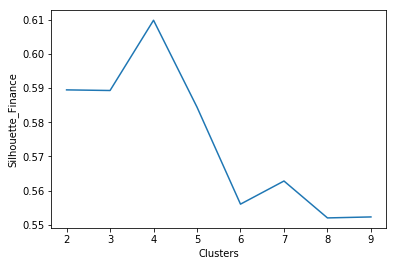

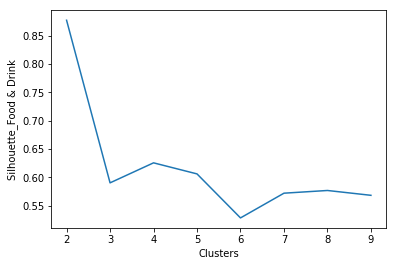

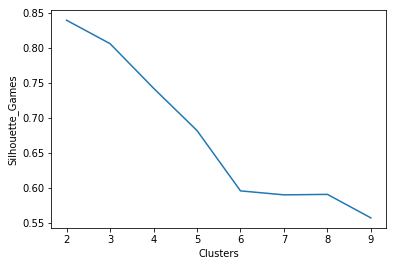

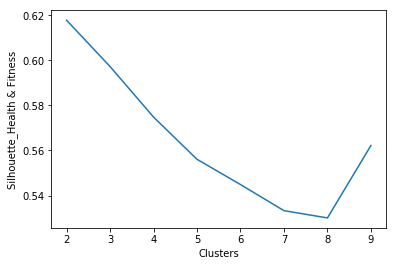

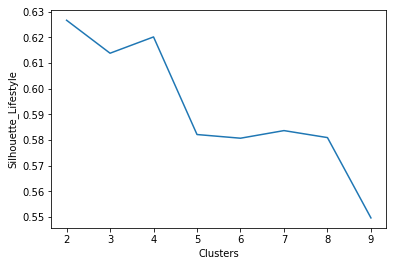

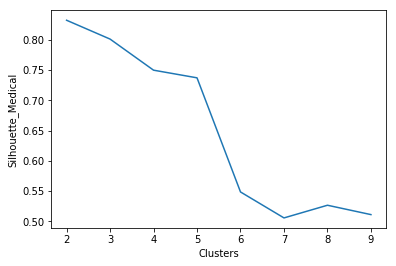

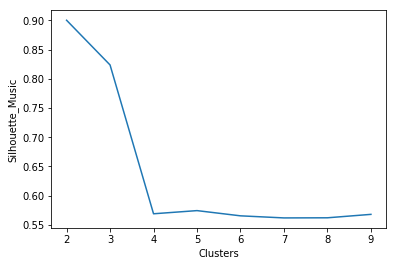

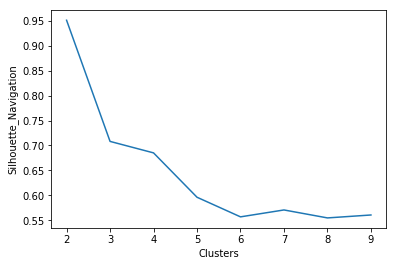

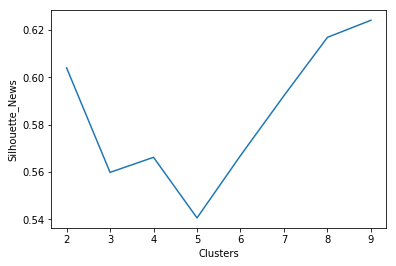

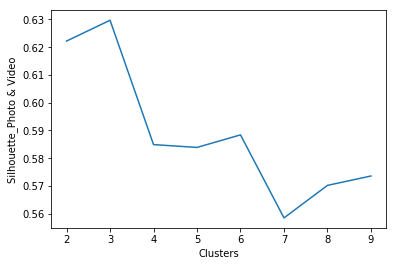

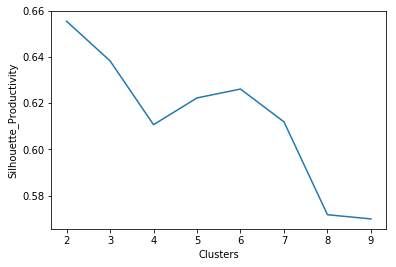

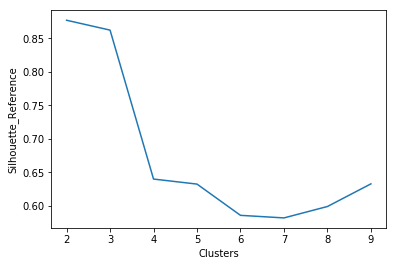

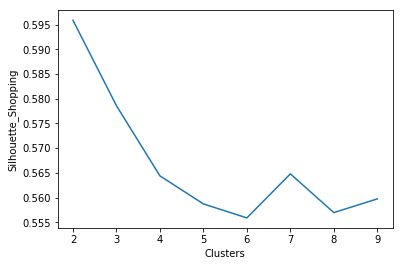

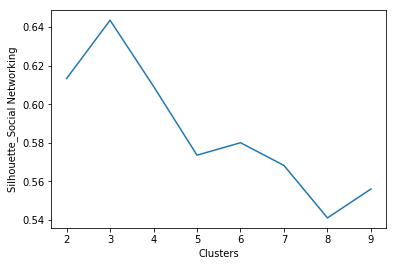

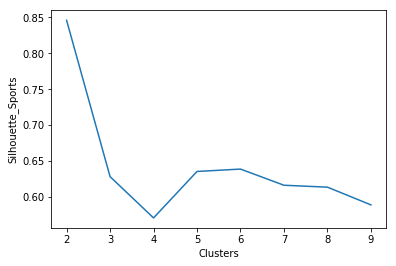

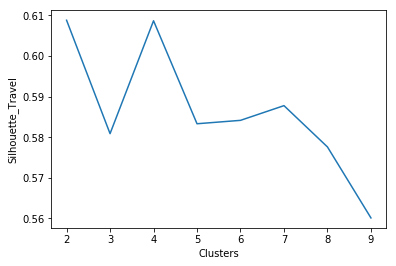

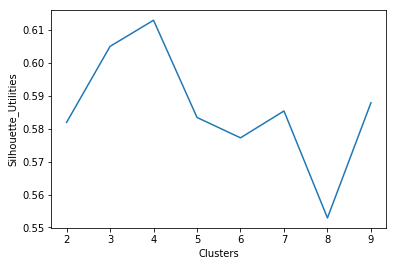

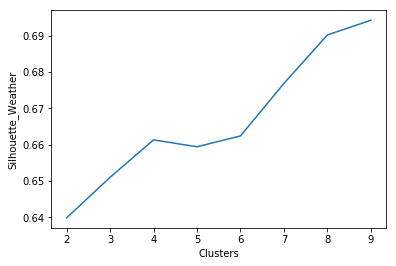

In [77]:
#plot of silhouette with different number clusters for each genre
for i in range(len(q)):
    aver=remove_duplicates(q["{0}".format(e[i])])
    plt.plot(range(2,10),aver)
    plt.xlabel('Clusters')
    plt.ylabel("Silhouette_{0}".format(e[i]))
    plt.show()

In [ ]:
#There is no one single common solution with the analysis of the Silhouette 
#(3 5 9 3 3 4 2 2 2 2 2 2 2 9 3 2 2 2 3 2 4 4 9 ) Best average solution is 2 clusters

In [ ]:
#3 clusters: the best solution for each genre 

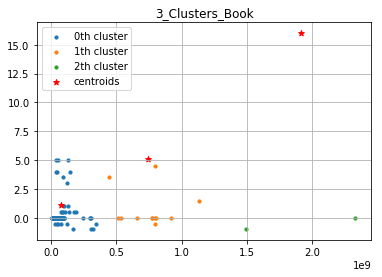

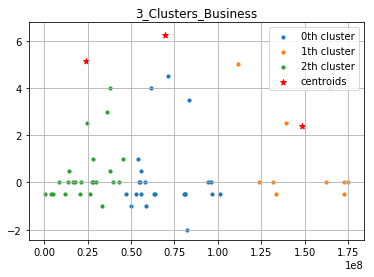

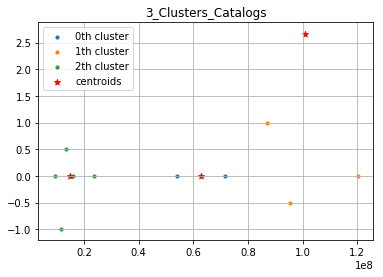

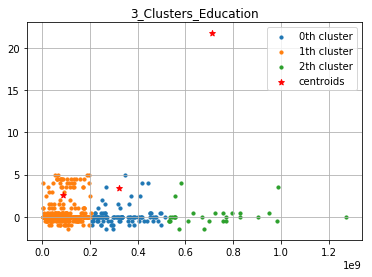

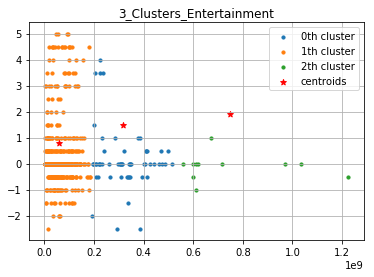

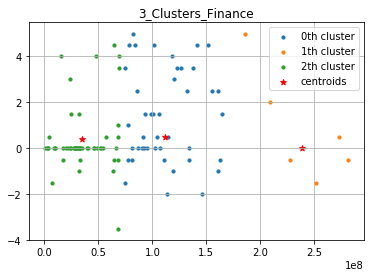

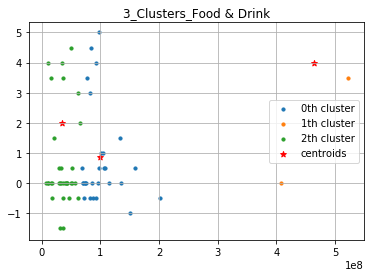

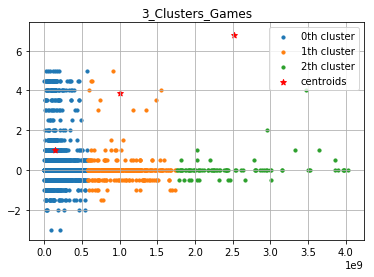

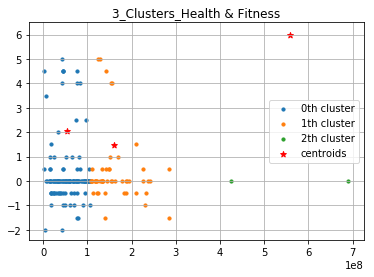

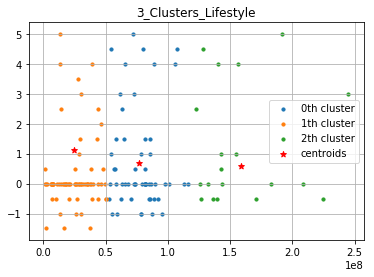

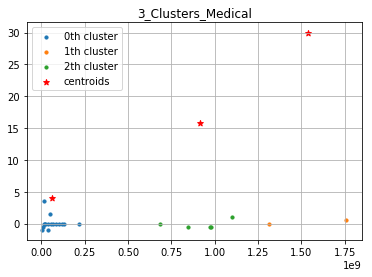

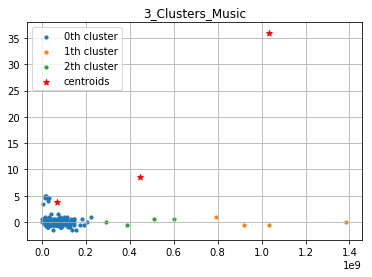

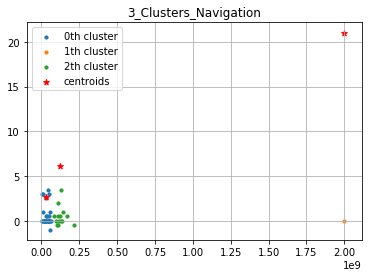

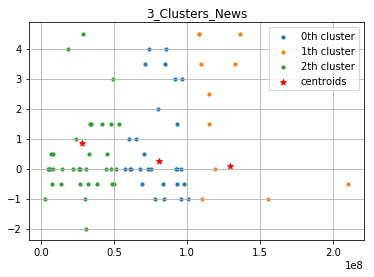

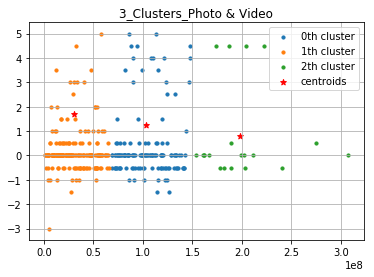

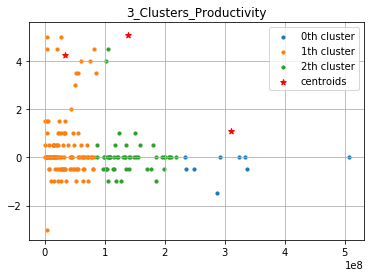

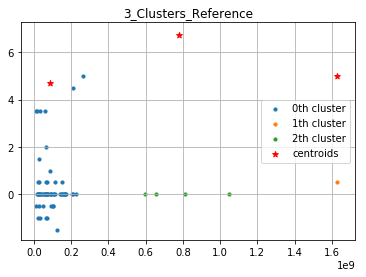

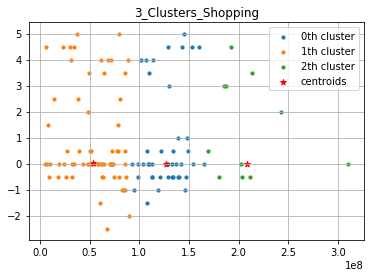

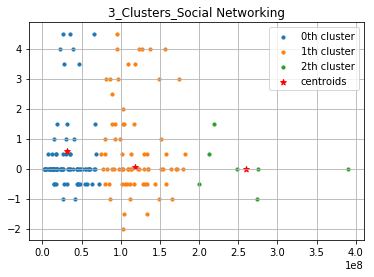

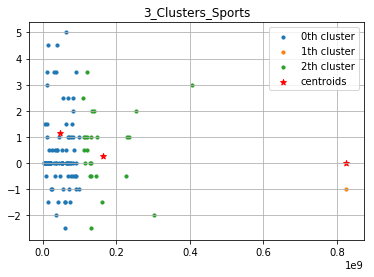

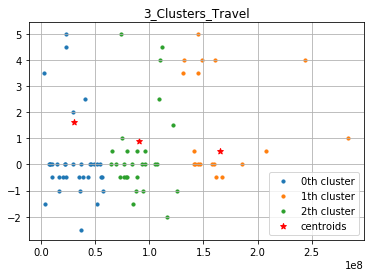

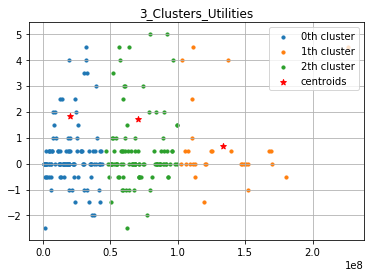

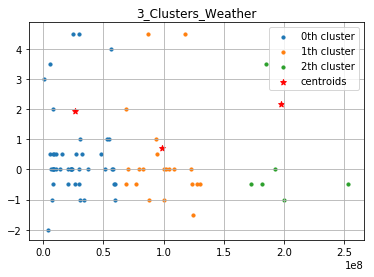

In [36]:
km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=42)
for j in range(len(d)):
    temp=d["{0}".format(e[j])].drop(d["{0}".format(e[j])].columns[[-2,-3]], axis=1)
    y_km = km.fit_predict(temp)
    labels=np.unique(y_km)
    for i in range(len(labels)): # repeat varying i in the range of the length of labels
        X_plot=temp[y_km==i]
        plt.scatter(X_plot.iloc[:,0], X_plot.iloc[:,-1], marker='o', s=10,label='{0}th cluster'.format(i))
    plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',c='red', label='centroids')
    plt.title("3_Clusters_{0}".format(e[j]))
    plt.legend()
    plt.grid()  # plots a grid on the data
    plt.show()